## Prediction using unsupervised machine learning : from the given dataset predict the optium number of cluster and represent it visually

In [46]:
# Step 1 : Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [47]:
# Step 2 : Load and Explore the Dataset
iris_data = pd.read_csv('Iris.csv')
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [48]:
# Step 3 : Data Preprocessing
# Standardizing features to have zero mean and unit variance is a common preprocessing step in machine learning. It is also known as feature scaling or normalization. The goal is to transform the data in such a way that each feature (column) has a mean of 0 and a standard deviation of 1.
features = iris_data.iloc[:,1:5]

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)



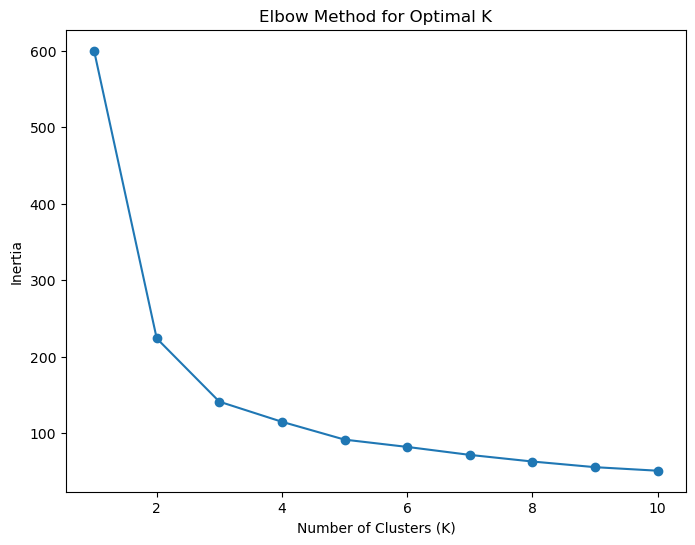

In [49]:
# Step 4 : Find the Optimal Number of CLusters(K)
#Using the Elbow Method to find the optimal number of clusters
# Set environment variable to avoid KMeans memory leak on Windows with MKL

inertia = [] # measures how well a dataset was clustered by K-Means
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_standardized)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [52]:
# Step 5 : Apply K-means Clustering with Optimal K
#Based on the Elbow Method,choose hte optimal number of clusters(K) and apply K-means clustering.

# choose hte optimal number of clusters (K)
optimal_k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
iris_data['Cluster'] = kmeans.fit_predict(features_standardized)


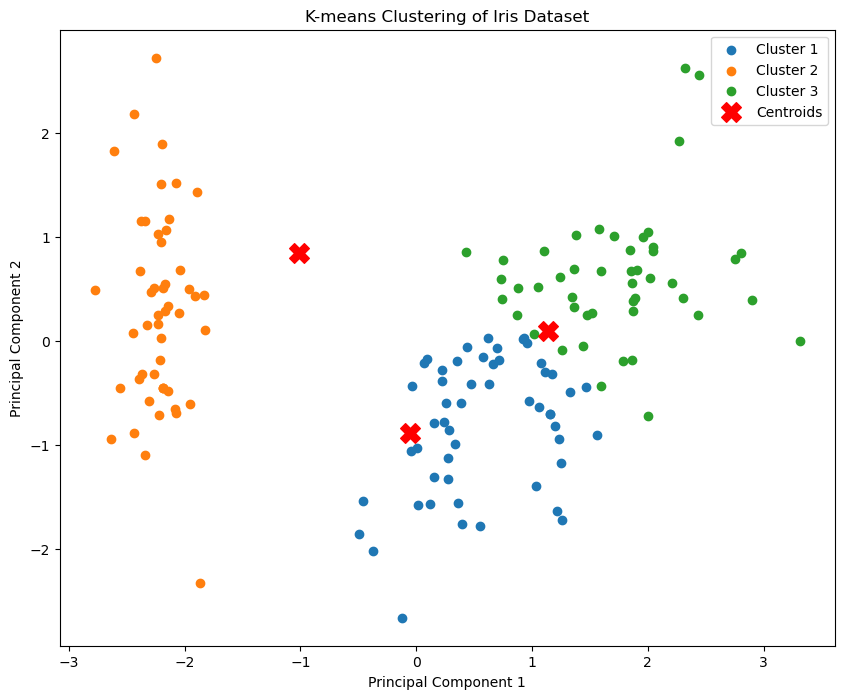

In [54]:
# Step 6 : Apply PCA for visualization

pca =PCA(n_components = 2)
principal_components = pca.fit_transform(features_standardized)
iris_data[['PC1', 'PC2']] = principal_components

#Visualize the clusters

plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    cluster_data = iris_data[iris_data['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster + 1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()